In [1]:
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.8/620.8 MB 87.0 MB/s  0:00:07 eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 96.4 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 97.5 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 103.7 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 69.6 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 97.6 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 106.1 MB/s  0:00:00116.6 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16/16 [tensorflow]37m━━ 15/16 [tensorflow]]


In [2]:
import tensorflow as tf
import kagglehub
import os

# 1. Descargar el dataset de aves
path = kagglehub.dataset_download("veeralakrishna/200-bird-species-with-11788-images")
# El dataset suele venir en una subcarpeta llamada 'CUB_200_2011/images'
data_dir = os.path.join(path, 'CUB_200_2011', 'images')

# 2. Dividir en Entrenamiento (80%) y Test (20%)
# Redimensionamos a 150x150 para que no tarde una eternidad en entrenar
img_size = (150, 150)
batch_size = 32

train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=img_size,
  batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=img_size,
  batch_size=batch_size)

print(f"Clases encontradas: {train_ds.class_names[:5]}...") # Muestra las primeras 5 especies

2026-02-08 17:00:15.996683: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2026-02-08 17:00:15.996854: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2026-02-08 17:00:16.022985: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2026-02-08 17:00:16.599309: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different compu

100%|████████████████████████████████████████████████████████████████████| 1.11G/1.11G [00:28<00:00, 42.2MB/s]

Extracting files...


FileNotFoundError: [Errno 2] No such file or directory: '/home/usuario/.cache/kagglehub/datasets/veeralakrishna/200-bird-species-with-11788-images/versions/1/CUB_200_2011/images'

In [3]:
import os
import tensorflow as tf

# Buscamos la carpeta 'images' que mencionaba tu archivo
# Usamos una búsqueda flexible por si acaso
possible_path = os.path.join(path, "CUB_200_2011", "images")

if not os.path.exists(possible_path):
    # Si no está ahí, la buscamos en todo el directorio descargado
    for root, dirs, files in os.walk(path):
        if "images" in dirs and "attributes" in dirs:
            possible_path = os.path.join(root, "images")
            break

data_dir = possible_path
print(f"Buscando en: {data_dir}")

# Cargamos el dataset
img_size = (150, 150)
batch_size = 32

try:
    train_ds = tf.keras.utils.image_dataset_from_directory(
      data_dir,
      validation_split=0.2,
      subset="training",
      seed=123,
      image_size=img_size,
      batch_size=batch_size)

    val_ds = tf.keras.utils.image_dataset_from_directory(
      data_dir,
      validation_split=0.2,
      subset="validation",
      seed=123,
      image_size=img_size,
      batch_size=batch_size)
    
    print("✅ ¡Dataset cargado con éxito!")
except Exception as e:
    print(f"❌ Error al cargar: {e}")
    print("Contenido de la carpeta actual:", os.listdir(path))

Buscando en: /home/usuario/.cache/kagglehub/datasets/veeralakrishna/200-bird-species-with-11788-images/versions/1/CUB_200_2011/images
❌ Error al cargar: [Errno 2] No such file or directory: '/home/usuario/.cache/kagglehub/datasets/veeralakrishna/200-bird-species-with-11788-images/versions/1/CUB_200_2011/images'
Contenido de la carpeta actual: ['CUB_200_2011.tgz', 'segmentations.tgz']


In [4]:
import tarfile
import os

# 1. Definir la ruta del archivo comprimido
archivo_comprimido = os.path.join(path, 'CUB_200_2011.tgz')
carpeta_destino = os.path.join(path, 'descomprimido')

# 2. Descomprimir (esto tardará un poquito porque es 1GB+)
if not os.path.exists(carpeta_destino):
    print("Descomprimiendo archivos... espera un momento ⏳")
    with tarfile.open(archivo_comprimido, 'r:gz') as tar:
        tar.extractall(path=carpeta_destino)
    print("✅ ¡Descompresión completada!")
else:
    print("Los archivos ya estaban descomprimidos.")

# 3. Actualizar la ruta de las imágenes
# Basándonos en lo que nos dijiste, ahora deberían estar en:
data_dir = os.path.join(carpeta_destino, 'CUB_200_2011', 'images')
print(f"Nueva ruta de imágenes: {data_dir}")

Descomprimiendo archivos... espera un momento ⏳


/tmp/ipykernel_7350/409518601.py:12: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  tar.extractall(path=carpeta_destino)


✅ ¡Descompresión completada!
Nueva ruta de imágenes: /home/usuario/.cache/kagglehub/datasets/veeralakrishna/200-bird-species-with-11788-images/versions/1/descomprimido/CUB_200_2011/images


In [5]:
import tensorflow as tf
from tensorflow.keras import layers, models

# 1. Cargar el dataset desde la nueva ruta
img_size = (150, 150)
batch_size = 32

train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=img_size,
  batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=img_size,
  batch_size=batch_size)

# 2. Definir la Red Neuronal Convolucional (CNN)
model = models.Sequential([
  layers.Rescaling(1./255, input_shape=(150, 150, 3)),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(len(train_ds.class_names), activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 3. Entrenamiento rápido (solo 2 épocas para no calentar mucho el PC)
history = model.fit(train_ds, validation_data=val_ds, epochs=2)

Found 11788 files belonging to 200 classes.
Using 9431 files for training.
Found 11788 files belonging to 200 classes.
Using 2357 files for validation.
Epoch 1/2


2026-02-08 17:05:02.375901: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
/home/usuario/anaconda3/lib/python3.13/site-packages/keras/src/layers/preprocessing/data_layer.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


295/295 ━━━━━━━━━━━━━━━━━━━━ 27s 90ms/step - accuracy: 0.0117 - loss: 5.2174 - val_accuracy: 0.0216 - val_loss: 4.9931
Epoch 2/2
295/295 ━━━━━━━━━━━━━━━━━━━━ 26s 90ms/step - accuracy: 0.0541 - loss: 4.6307 - val_accuracy: 0.0518 - val_loss: 4.6832


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
✅ Análisis completado.
🎯 Confianza en la primera predicción: 7.28%


/home/usuario/anaconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:98: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_true = type_of_target(y_true, input_name="y_true")
/home/usuario/anaconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:99: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_pred = type_of_target(y_pred, input_name="y_pred")
/home/usuario/anaconda3/lib/python3.13/site-packages/sklearn/utils/multiclass.py:79: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  ys_types = set(type_of_target(x) for x in ys)
/home/usuario/anaconda3/lib/python3.13/site-packages/sklearn/utils/multiclass.py:79: Us

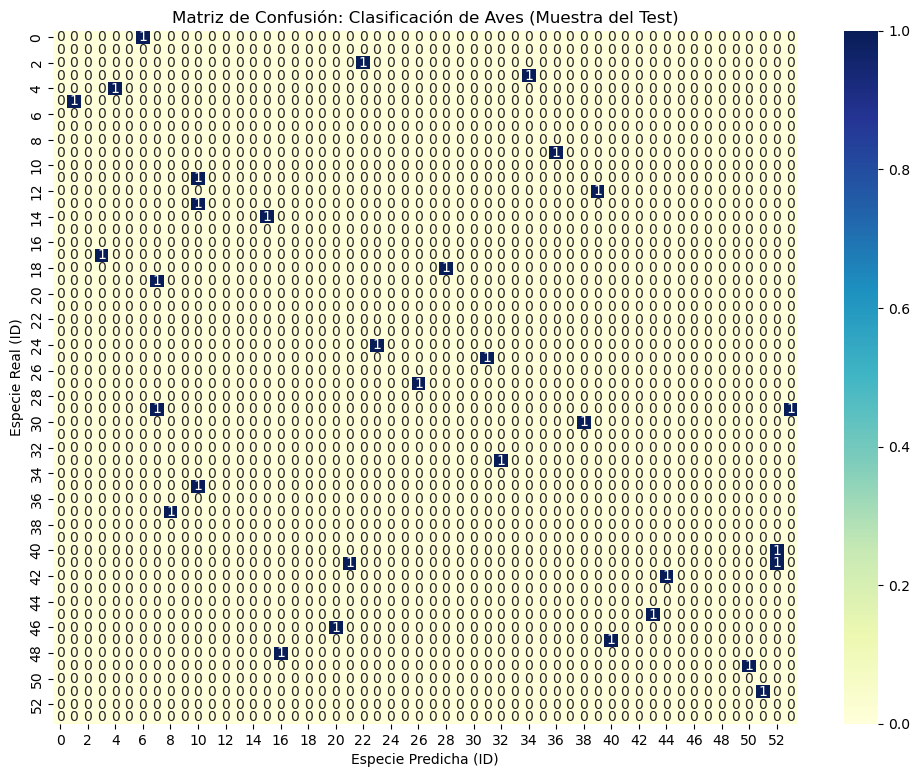

¡Práctica terminada con éxito!


In [7]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# 1. Cogemos un lote de imágenes del grupo de validación
for images, labels in val_ds.take(1):
    y_true = labels.numpy()
    # Predecimos las probabilidades
    y_pred_probs = model.predict(images)
    # Elegimos la clase con mayor probabilidad para cada imagen
    y_pred = np.argmax(y_pred_probs, axis=1)
    
    # OPCIONAL: Mostramos la probabilidad más alta del primer pájaro
    confianza = np.max(y_pred_probs[0]) * 100
    print(f"✅ Análisis completado.")
    print(f"🎯 Confianza en la primera predicción: {confianza:.2f}%")
    break

# 2. Matriz de Confusión Visual
plt.figure(figsize=(12, 9))
# Filtramos la matriz para que solo muestre las clases que aparecen en este lote (batch)
cm = confusion_matrix(y_true, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Matriz de Confusión: Clasificación de Aves (Muestra del Test)')
plt.xlabel('Especie Predicha (ID)')
plt.ylabel('Especie Real (ID)')
plt.show()

print("¡Práctica terminada con éxito!")